In [1]:
import requests
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup as BS
from urllib.request import urlopen
from lxml import etree
import urllib
import pandas as pd
from datetime import timedelta

%matplotlib inline

In [2]:
full_2016 = pd.read_csv('full2016.csv')
full_2016['Year'] = '2016'
full_2016.head()

,Unnamed: 0,Overall,Bib,Name,Time,Year
0,0,1,1,Scott Wietecha,02:25:42,2016
1,1,2,3,Brian Shelton,02:34:43,2016
2,2,3,1047,Christopher Capps,02:38:43,2016
3,3,4,1052,Jason Grimes,02:45:06,2016
4,4,5,1046,David Adams,02:47:28,2016


In [3]:
full_2016 = full_2016.rename(columns = {'Unnamed: 0':'no_title'})
full_df_2016 = full_2016.drop(['no_title'], axis=1)
marathons_2016 = full_df_2016[['Year','Overall','Bib','Name','Time']]
marathons_2016.head(2)

,Year,Overall,Bib,Name,Time
0,2016,1,1,Scott Wietecha,02:25:42
1,2016,2,3,Brian Shelton,02:34:43


In [4]:
marathons_2016.shape

(3842, 5)

In [5]:
marathons_2016.Time = pd.to_timedelta(marathons_2016.Time)

In [6]:
non_competitors = marathons_2016[marathons_2016['Time']=='00:00:00']
non_competitors.head()

,Year,Overall,Bib,Name,Time
2952,2016,99999,27326,Ashley Newton,0 days
2953,2016,99999,2031,Thomas Sirna,0 days
2954,2016,99999,4027,Sulaiman Seriki,0 days
2955,2016,99999,17252,Carol Mulderink,0 days
2956,2016,99999,27187,Philip Alvarado,0 days


In [7]:
competitors = marathons_2016[marathons_2016['Time']>'00:00:00']
competitors.head()

,Year,Overall,Bib,Name,Time
0,2016,1,1,Scott Wietecha,02:25:42
1,2016,2,3,Brian Shelton,02:34:43
2,2016,3,1047,Christopher Capps,02:38:43
3,2016,4,1052,Jason Grimes,02:45:06
4,2016,5,1046,David Adams,02:47:28


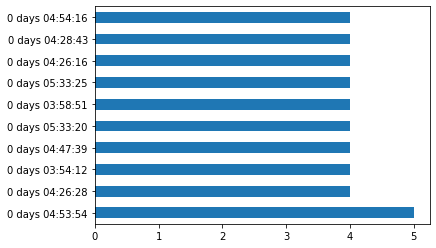

In [8]:
competitors.Time.value_counts().head(10).plot(kind='barh')

In [9]:
full_2017 = pd.read_csv('full2017.csv')
full_2017['Year'] = '2017'
full_2017.head()

,Unnamed: 0,Overall,Bib,Name,Time,Year
0,0,1,1,Scott Wietecha,02:40:25,2017
1,1,2,1145,Ryan Regnier,02:56:28,2017
2,2,3,1147,Daniel Everett,03:00:55,2017
3,3,4,1029,Khris Vickroy,03:04:47,2017
4,4,5,1119,Marcus Dilallo,03:04:53,2017


In [10]:
full_2017.shape

(3651, 6)

In [11]:
full_2017 = full_2017.rename(columns = {'Unnamed: 0':'no_title'})
full_df_2017 = full_2017.drop(['no_title'], axis=1)
marathons_2017 = full_df_2017[['Year','Overall','Bib','Name','Time']]
marathons_2017.head(2)

,Year,Overall,Bib,Name,Time
0,2017,1,1,Scott Wietecha,02:40:25
1,2017,2,1145,Ryan Regnier,02:56:28


In [12]:
marathons_2017.Time = pd.to_timedelta(marathons_2017.Time)

In [13]:
full_2018 = pd.read_csv('full2018.csv')
full_2018['Year'] = '2018'
full_2018.head()

,Unnamed: 0,Overall,Bib,Name,Time,Year
0,0,1,1,Scott Wietecha,02:28:16,2018
1,1,2,3,Garang Madut,02:29:52,2018
2,2,3,33442,Kevin Fink,02:38:59,2018
3,3,4,33441,Andrew Hodges,02:43:59,2018
4,4,5,30028,Nicholas Aubert,02:48:11,2018


In [14]:
full_2018.shape

(2115, 6)

In [15]:
full_2018 = full_2018.rename(columns = {'Unnamed: 0':'no_title'})
full_df_2018 = full_2018.drop(['no_title'], axis=1)
marathons_2018 = full_df_2018[['Year','Overall','Bib','Name','Time']]
marathons_2018.head(2)

,Year,Overall,Bib,Name,Time
0,2018,1,1,Scott Wietecha,02:28:16
1,2018,2,3,Garang Madut,02:29:52


In [16]:
marathons_2018.Time = pd.to_timedelta(marathons_2018.Time)

In [17]:
full_2019 = pd.read_csv('full2019.csv')
full_2019['Year'] = '2019'
full_2019.head()

,Unnamed: 0,Overall,Bib,Name,Time,Year
0,1,2,1,Scott Wietecha,2019-09-24 02:34:59,2019
1,2,3,4,Jordan Wilson,2019-09-24 02:35:24,2019
2,3,4,30034,Steelton Flynn,2019-09-24 02:39:59,2019
3,4,5,30035,Thomas Ellis,2019-09-24 02:42:09,2019
4,5,6,33172,Nicholas Tseffos,2019-09-24 02:48:42,2019


In [18]:
full_2019.shape

(2810, 6)

In [19]:
dt_2019 = full_2019.Time.str.split(" ", expand=True)
marathons_dt_2019 = dt_2019.join(full_2019, how='outer')
marathons_dt_2019 = marathons_dt_2019.rename(columns = {0:'date',1:'real_time','Unnamed: 0':'no_title','Time':'DT'})
marathons_dt_2019 = marathons_dt_2019.drop(['DT','date','no_title'], axis=1)
marathons_2019 = marathons_dt_2019.rename(columns = {'real_time':'Time'})
marathons_2019 = marathons_2019[['Year','Overall','Bib','Name','Time']]
marathons_2019.head()

,Year,Overall,Bib,Name,Time
0,2019,2,1,Scott Wietecha,02:34:59
1,2019,3,4,Jordan Wilson,02:35:24
2,2019,4,30034,Steelton Flynn,02:39:59
3,2019,5,30035,Thomas Ellis,02:42:09
4,2019,6,33172,Nicholas Tseffos,02:48:42


In [20]:
marathons_2019.Time = pd.to_timedelta(marathons_2018.Time)

In [21]:
full_marathons = pd.concat([marathons_2019, marathons_2018, marathons_2017, marathons_2016])
full_marathons.head()

,Year,Overall,Bib,Name,Time
0,2019,2,1,Scott Wietecha,02:28:16
1,2019,3,4,Jordan Wilson,02:29:52
2,2019,4,30034,Steelton Flynn,02:38:59
3,2019,5,30035,Thomas Ellis,02:43:59
4,2019,6,33172,Nicholas Tseffos,02:48:11


In [22]:
type(full_marathons)

pandas.core.frame.DataFrame

In [23]:
full_marathons.groupby(['Year','Name']).size().head()

Year  Name            
2016  Aaron Carpenter     1
      Aaron Cole          1
      Aaron Fidler        1
      Aaron Freesmeier    1
      Aaron Garrett       1
dtype: int64

In [24]:
full_marathons.shape

(12418, 5)

In [25]:
full_marathons.Name.value_counts().head()

Brett Smith       6
James Evans       5
Richard Brooks    5
Debra Shone       5
Dean Bowden       4
Name: Name, dtype: int64

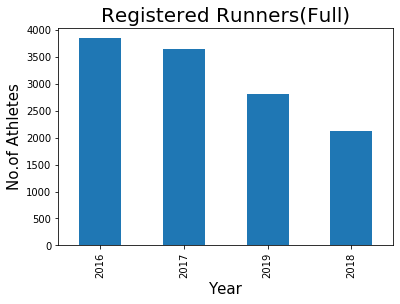

In [26]:
full_marathons.Year.value_counts().plot(kind='bar')
plt.xlabel('Year', size=15)
plt.ylabel('No.of Athletes', size=15)
plt.title('Registered Runners(Full)', size=20)
plt.savefig('Full Marathons')

In [27]:
non_competitors_full = full_marathons[full_marathons['Time']=='00:00:00']
non_competitors_full.head()

,Year,Overall,Bib,Name,Time
2107,2019,99999,32837,Phalla Yann,0 days
2108,2019,99999,32248,Bailey Via,0 days
2109,2019,99999,32631,Stacy Frett,0 days
2110,2019,99999,31974,Isabella Raponi,0 days
2111,2019,99999,32367,Jada Duck,0 days


Text(0.5, 1.0, 'Full Marathon Non-Competitors')

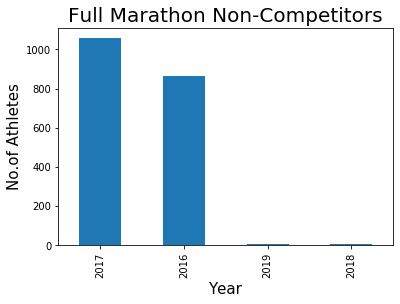

In [28]:
non_competitors_full.Year.value_counts().plot(kind='bar')
plt.xlabel('Year', size=15)
plt.ylabel('No.of Athletes', size=15)
plt.title('Full Marathon Non-Competitors', size=20)
#plt.savefig('Half Marathons')

In [29]:
competitors_time_full = full_marathons[full_marathons['Time']>'00:00:00']
competitors_time_full.tail()

,Year,Overall,Bib,Name,Time
3460,2016,99999,1167,Jereme Wilroy,02:31:30
3654,2016,99999,11146,Robert Catlin,05:13:04
3681,2016,99999,2474,Hadley Miller,02:46:53
3713,2016,99999,26003,Alyson Cook,06:27:05
3821,2016,99999,27141,Jessica Scott,06:49:41


In [30]:
competitors_time_full = full_marathons[full_marathons['Time'] == '00:00:00'].index
competitors_full = full_marathons.drop(competitors_time_full, inplace=False)
competitors_full.head()

,Year,Overall,Bib,Name,Time
0,2019,2,1,Scott Wietecha,02:28:16
1,2019,3,4,Jordan Wilson,02:29:52
2,2019,4,30034,Steelton Flynn,02:38:59
3,2019,5,30035,Thomas Ellis,02:43:59
4,2019,6,33172,Nicholas Tseffos,02:48:11


In [31]:
competitors_full.shape

(9618, 5)

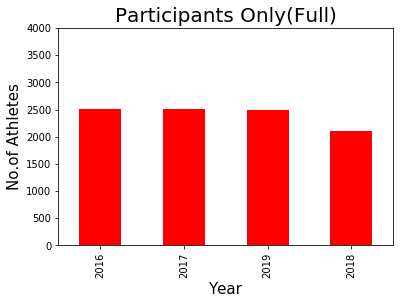

In [32]:
competitors_full.Year.value_counts().plot(kind='bar', color='red')
plt.xlabel('Year', size=15)
plt.ylabel('No.of Athletes', size=15)
plt.ylim(0, 4000)
plt.title('Participants Only(Full)', size=20)
plt.savefig('competitors graph')

In [33]:
full_top_ten = competitors_full.sort_values(by=['Time'], ascending=[True])
full_top_ten['Marathon'] = 'Full'
full_top_ten.head(10)

,Year,Overall,Bib,Name,Time,Marathon
2469,2017,99999,1202,Andre Mcdonald,02:08:22,Full
2936,2017,99999,15476,Ashley Grindstaff,02:19:14,Full
2737,2017,99999,2104,George Spilich,02:24:21,Full
2606,2017,99999,15071,Kenneth Moffat,02:25:00,Full
0,2016,1,1,Scott Wietecha,02:25:42,Full
0,2018,1,1,Scott Wietecha,02:28:16,Full
0,2019,2,1,Scott Wietecha,02:28:16,Full
1,2019,3,4,Jordan Wilson,02:29:52,Full
1,2018,2,3,Garang Madut,02:29:52,Full
1,2016,2,3,Brian Shelton,02:34:43,Full


In [34]:
non_completions = full_top_ten[full_top_ten['Overall'] == 99999 ].index
full_top_ten.drop(non_completions , inplace=True)
full_top_ten.head(10)

,Year,Overall,Bib,Name,Time,Marathon
0,2016,1,1,Scott Wietecha,02:25:42,Full
0,2018,1,1,Scott Wietecha,02:28:16,Full
0,2019,2,1,Scott Wietecha,02:28:16,Full
1,2019,3,4,Jordan Wilson,02:29:52,Full
1,2018,2,3,Garang Madut,02:29:52,Full
1,2016,2,3,Brian Shelton,02:34:43,Full
2,2016,3,1047,Christopher Capps,02:38:43,Full
2,2018,3,33442,Kevin Fink,02:38:59,Full
2,2019,4,30034,Steelton Flynn,02:38:59,Full
0,2017,1,1,Scott Wietecha,02:40:25,Full


In [35]:
top_sorted = full_top_ten.sort_values(by=['Time'], ascending=[True])
top_sorted.head(12)

,Year,Overall,Bib,Name,Time,Marathon
0,2016,1,1,Scott Wietecha,02:25:42,Full
0,2018,1,1,Scott Wietecha,02:28:16,Full
0,2019,2,1,Scott Wietecha,02:28:16,Full
1,2019,3,4,Jordan Wilson,02:29:52,Full
1,2018,2,3,Garang Madut,02:29:52,Full
1,2016,2,3,Brian Shelton,02:34:43,Full
2,2016,3,1047,Christopher Capps,02:38:43,Full
2,2018,3,33442,Kevin Fink,02:38:59,Full
2,2019,4,30034,Steelton Flynn,02:38:59,Full
0,2017,1,1,Scott Wietecha,02:40:25,Full


In [36]:
scott_winnings = full_marathons[full_marathons['Name'] == 'Scott Wietecha']
scott_winnings

,Year,Overall,Bib,Name,Time
0,2019,2,1,Scott Wietecha,02:28:16
0,2018,1,1,Scott Wietecha,02:28:16
0,2017,1,1,Scott Wietecha,02:40:25
0,2016,1,1,Scott Wietecha,02:25:42


In [37]:
scott_winnings ['Time'] = pd.to_datetime(scott_winnings['Time'])

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3325: FutureWarning: Passing timedelta64-dtype data is deprecated, will raise a TypeError in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


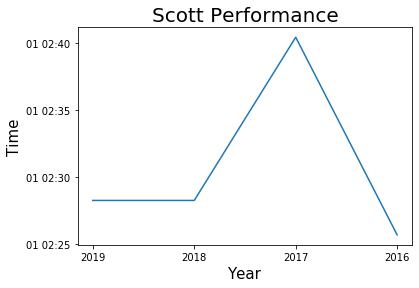

In [38]:
plt.plot(scott_winnings.Year, scott_winnings.Time)
plt.xlabel('Year', size=15)
plt.ylabel('Time', size=15)
plt.title('Scott Performance', size=20)
#plt.ylim(['02:45:00', '02:20:00'])
plt.savefig('Scott Perfomance')

In [39]:
half_2016 = pd.read_csv('half2016.csv')
half_2016['Year'] = '2016'
half_2016.head()

,Unnamed: 0,Overall,Bib,Name,Time,Year
0,0,1,201,Roosevelt Cook,01:11:15,2016
1,1,2,204,Bill Martin,01:11:50,2016
2,2,3,1623,Cody Hodgins,01:13:43,2016
3,3,4,1222,Andrew Archer,01:15:04,2016
4,4,5,1224,Brian Syring,01:15:30,2016


In [40]:
half_2016.shape

(22429, 6)

In [41]:
half_2016.Time = pd.to_timedelta(half_2016.Time)

In [42]:
half_2017 = pd.read_csv('half2017.csv')
half_2017['Year'] = '2017'
half_2017.head()

,Unnamed: 0,Overall,Bib,Name,Time,Year
0,0,1,202,Tyler Andrews,01:10:58,2017
1,1,2,204,Bill Martin,01:11:25,2017
2,2,3,206,Nick French,01:11:42,2017
3,3,4,201,Roosevelt Cook,01:13:20,2017
4,4,5,1655,Erick Kigen,01:14:56,2017


In [43]:
half_2017.shape

(22292, 6)

In [44]:
half_2017.Time = pd.to_timedelta(half_2017.Time)

In [45]:
half_2018 = pd.read_csv('half2018.csv')
half_2018['Year'] = '2018'
half_2018.head()

,Unnamed: 0,Overall,Bib,Name,Time,Year
0,0,1,103,Roosevelt Cook,01:09:25,2018
1,1,2,107,Lucas Cotter,01:09:51,2018
2,2,3,105,Nick French,01:10:38,2018
3,3,4,106,Jason Vincze,01:11:50,2018
4,4,5,104,Joseph Elsakr,01:13:28,2018


In [46]:
half_2018.shape

(14940, 6)

In [47]:
half_2018.Time = pd.to_timedelta(half_2018.Time)

In [48]:
half_2019 = pd.read_csv('half2019.csv')
half_2019['Year'] = '2019'
half_2019.head()

,Unnamed: 0,Overall,Bib,Name,Time,Year
0,0,1,31,Nick French,01:10:03,2019
1,1,2,33,Ian Bordelon,01:12:15,2019
2,2,3,32,Chris Demetra,01:12:52,2019
3,3,4,1025,Grayson Reid,01:15:10,2019
4,4,5,34,Jason Vincze,01:17:01,2019


In [49]:
half_2019.shape

(17236, 6)

In [50]:
half_2019.Time = pd.to_timedelta(half_2019.Time)

In [51]:
half_df = pd.concat([half_2019, half_2018, half_2017, half_2016])
half_df.head()

,Unnamed: 0,Overall,Bib,Name,Time,Year
0,0,1,31,Nick French,01:10:03,2019
1,1,2,33,Ian Bordelon,01:12:15,2019
2,2,3,32,Chris Demetra,01:12:52,2019
3,3,4,1025,Grayson Reid,01:15:10,2019
4,4,5,34,Jason Vincze,01:17:01,2019


In [52]:
half_df = half_df.rename(columns={"Unnamed: 0": "no_name"})
half_df = half_df.drop(['no_name'], axis=1)
half_marathons = half_df[['Year','Overall','Bib','Name','Time']]
half_marathons.head()

,Year,Overall,Bib,Name,Time
0,2019,1,31,Nick French,01:10:03
1,2019,2,33,Ian Bordelon,01:12:15
2,2019,3,32,Chris Demetra,01:12:52
3,2019,4,1025,Grayson Reid,01:15:10
4,2019,5,34,Jason Vincze,01:17:01


In [53]:
half_marathons.shape

(76897, 5)

In [54]:
half_marathons.Year.value_counts()

2016    22429
2017    22292
2019    17236
2018    14940
Name: Year, dtype: int64

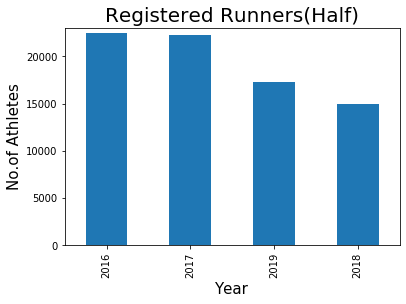

In [55]:
half_marathons.Year.value_counts().plot(kind='bar')
plt.xlabel('Year', size=15)
plt.ylabel('No.of Athletes', size=15)
plt.ylim(0, 23000)
plt.title('Registered Runners(Half)', size=20)
plt.savefig('Half Marathons')

In [56]:
competitors_half = half_marathons[half_marathons['Time']>'00:00:00']
competitors_half.tail()

,Year,Overall,Bib,Name,Time
17915,2016,18150,22378,Becki Baumgartner,04:54:39
17916,2016,18151,21599,Christine Bamberger,04:54:41
19245,2016,99999,25610,Amy Saffell,02:42:13
19549,2016,99999,37147,Nancy Armstrong,02:11:31
20774,2016,99999,28465,Vickey Boston,01:41:13


In [57]:
competitors_half.Year.value_counts()

2016    17920
2017    17712
2018    14940
2019    13706
Name: Year, dtype: int64

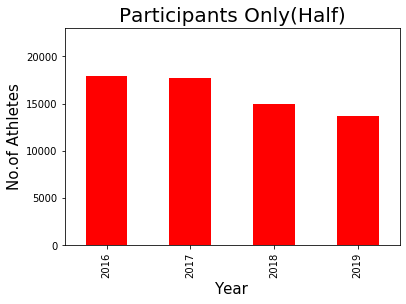

In [58]:
competitors_half.Year.value_counts().plot(kind='bar', color='red')
plt.xlabel('Year', size=15)
plt.ylabel('No.of Athletes', size=15)
plt.ylim(0, 23000)
plt.title('Participants Only(Half)', size=20)
plt.savefig('competitors_half graph')

In [59]:
competitors_half.dtypes

Year                object
Overall              int64
Bib                  int64
Name                object
Time       timedelta64[ns]
dtype: object

In [60]:
competitors_half.shape

(64278, 5)